# Proyek Analisis Data: Bike Share
- Nama : SONIA LIDARA
- Email : sonialidara@gmail.com
- ID Dicoding :  <a href='https://www.dicoding.com/users/soniallidara02/' target="_blank">sonialidara02</a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- 1. Berapa jumlah total sewa sepeda (total_count) untuk tahun 2012 selama musim gugur (musim 3)?
- 2. Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011?
- 3. Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?
- 4. Apa hubungan suhu (temp) dengan jumlah pengguna yang terdaftar (registered)?
-5. Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) selama musim gugur (season 3)?

## Menyaipkan semua library yang dibuthkan

In [ ]:
#library
import pandas as pd
import plotly
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

## Data Wrangling

Data wrangling adalah proses pengumpulan, pembersihan, transformasi, dan penyusunan data mentah menjadi bentuk yang lebih berguna dan mudah dimengerti untuk analisis. Ini melibatkan serangkaian langkah-langkah seperti penghapusan data yang tidak relevan atau tidak lengkap, penggabungan data dari berbagai sumber, penanganan nilai yang hilang atau duplikat, transformasi format data, dan lainnya. Tujuan utama dari data wrangling adalah untuk mempersiapkan data sehingga dapat digunakan secara efektif untuk analisis dan pemodelan data. Hal ini sering menjadi tahap yang penting dalam siklus hidup data sebelum data dapat digunakan untuk mendapatkan wawasan atau informasi yang berharga.

### Gathering Data

adalah tahap dalam proses analisis data di mana data dikumpulkan dari berbagai sumber. Hal ini melibatkan pengumpulan data dari database, sistem informasi, file teks, sensor, survei, atau sumber lainnya yang relevan dengan tujuan analisis yang ditetapkan. Proses pengumpulan data dapat dilakukan menggunakan berbagai metode, termasuk survei, pengumpulan data otomatis, atau pengunduhan data dari sumber online. Tujuan dari tahap pengumpulan data adalah untuk mengumpulkan data yang cukup dan representatif untuk mendukung analisis yang akan dilakukan.

In [ ]:
df_day = pd.read_csv("sample_data/dataset/day.csv")
df_hour = pd.read_csv("sample_data/dataset/hour.csv")

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

merupakan tahap dalam analisis data di mana data dievaluasi untuk memahami karakteristiknya, kualitasnya, dan kecocokannya untuk tujuan analisis yang ditetapkan. Proses penilaian data melibatkan pemeriksaan data untuk mengidentifikasi potensi masalah, seperti kecacatan, ketidaksesuaian, atau ketidakkonsistenan, serta untuk menentukan apakah data tersebut lengkap, relevan, dan dapat dipercaya. Penilaian data juga melibatkan eksplorasi statistik deskriptif, visualisasi data, dan pemahaman konteks di balik data. Tujuan dari tahap penilaian data adalah untuk memastikan bahwa data yang akan digunakan untuk analisis memenuhi standar kualitas yang diperlukan dan dapat diandalkan untuk menghasilkan wawasan yang akurat dan bermanfaat.

- Data Type

In [ ]:
print('Dataframe day:')
print(df_day.info())

print('\nDataframe hour:')
print(df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

- Missing Value

In [ ]:
print('Dataframe day:')
print(df_day.isna().sum())

print('\nDataframe hour:')
print(df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ditemukannya Nilai yang kosong atau Hilang pada df_day dan df_hour

- Duplicate Data

In [ ]:
print('Dataframe day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


Tidak ditemukan duplikasi

- Descriptive Statics

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


1. Dataset day
    - Jumlah data: 731 entri.
    - Musim paling umum: Musim panas (season 2).
    - Tahun yang dominan: 2012 (yr = 1).
    - Bulan yang paling sering muncul: Juli (mnth 7).
    - Hari libur hanya ada sekitar 2.87% dari total hari.
    - Hari kerja adalah mayoritas (sekitar 68.40%).
    - Cuaca rata-rata pada keadaan yang baik (weathersit 1).
    - Suhu rata-rata adalah sekitar 0.50 (41°C), dengan suhu perasaan rata-rata sekitar 0.47 (50°C).
    - Kelembaban rata-rata sekitar 0.47 (47%).
    - Kecepatan angin rata-rata adalah sekitar 0.63 (67% dari maksimal).
    - Jumlah pengguna casual rata-rata sekitar 848.
    - Jumlah pengguna terdaftar rata-rata sekitar 3656.
    - Total rental rata-rata sekitar 4504 per hari.

In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


2. Dataset hour
    - Dataset terdiri dari 17,379 entri.
    - Rata-rata kolom-kolom utama adalah sekitar:
        - Musim (season) 2.50, menunjukkan musim rata-rata.
        - Tahun (yr) 0.50, mengindikasikan perbandingan antara tahun 2011 dan 2012.
        - Bulan (mnth) 6.54, menunjukkan bulan rata-rata dalam setahun.
        - Jam (hr) 11.55, mengindikasikan jam rata-rata dalam sehari.
        - Hari libur (holiday) 0.03, persentase hari libur.
        - Hari dalam seminggu (weekday) 3.00, hari rata-rata dalam seminggu.
        - Hari kerja (workingday) 0.68, persentase hari kerja.
        - Kondisi cuaca (weathersit) 1.43, kondisi cuaca rata-rata.
        - Suhu (temp) 0.50, suhu rata-rata yang normal.
        - Suhu perasaan (atemp) 0.48, suhu perasaan mendekati suhu sebenarnya.
        - Kelembaban (hum) 0.48, kelembaban rata-rata.
        - Kecepatan angin (windspeed) 0.63, kecepatan angin rata-rata.
        - Pengguna casual (casual) 35.68, rata-rata jumlah pengguna casual.
        - Pengguna terdaftar (registered) 153.79, rata-rata jumlah pengguna terdaftar.
        - Total rental sepeda (cnt) 189.46, rata-rata jumlah total rental sepeda.

### Cleaning Data

adalah proses di mana data dievaluasi, dibersihkan, dan disesuaikan agar sesuai dengan kebutuhan analisis. Proses ini melibatkan identifikasi dan penanganan nilai-nilai yang hilang, duplikat, atau tidak valid, serta penyesuaian format data agar konsisten dan mudah dipahami. Selama tahap pembersihan data, kesalahan atau anomali dalam data diidentifikasi dan diperbaiki untuk memastikan keakuratan dan konsistensi data. Pembersihan data merupakan langkah penting dalam persiapan data sebelum analisis, yang bertujuan untuk menghasilkan data yang bersih, terstruktur, dan siap untuk digunakan dalam pemodelan atau visualisasi data.

- Fixed Data Type

In [ ]:
#clean up attribute names
df_day.rename(columns={'instant':'rec_id',
                        'dteday':'datetimes',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'yr':'year'},inplace=True)

df_hour.rename(columns={'instant':'rec_id',
                        'dteday':'datetimes',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'yr':'year'},inplace=True)

In [ ]:
df_day.head()

,rec_id,datetimes,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour.head()

,rec_id,datetimes,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_day["datetimes"] = pd.to_datetime(df_day["datetimes"])
df_hour["datetimes"] = pd.to_datetime(df_hour["datetimes"])

In [ ]:
# Cek data type :  df_day dan df_hour
print('df_day["datetimes"] : ', df_day["datetimes"].dtypes)
print('df_hour["datetimes"] : ', df_hour["datetimes"].dtypes)

df_day["datetimes"] :  datetime64[ns]
df_hour["datetimes"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

proses investigasi awal yang dilakukan pada data untuk memahami karakteristiknya secara visual dan deskriptif. Tujuannya adalah untuk mengidentifikasi pola, tren, anomali, atau hubungan yang menarik dalam data. EDA melibatkan penggunaan berbagai teknik visualisasi dan metode statistik ringkas untuk menjelajahi dataset, termasuk pembuatan histogram, diagram pencar (scatter plot), box plot, dan matriks korelasi. Analisis ini membantu peneliti atau analis dalam memahami struktur data, mengidentifikasi variabel penting, dan menghasilkan intuisi yang berguna sebelum melakukan analisis yang lebih mendalam atau membangun model prediktif.

### Explore ...

- Korelasi Variabel Numerik

In [ ]:
warnings.filterwarnings("ignore")

# df_day
correlation_matrix = df_day.corr()
fig = px.imshow(correlation_matrix)
fig.update_layout(title="Korelasi Variabel Numerik")
# html file
plotly.offline.plot(fig, filename='bike_share.html')
fig.show()

- Distribusi Variabel Numerik

In [ ]:
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']
for col in numeric_cols:
    fig = px.histogram(df_day, x=col, title=f'Distribusi {col}')
    # html file
    plotly.offline.plot(fig, filename='bike_share.html')
    fig.show()

- Distribusi Variabel Kategorikal

In [ ]:
#Descriptive statistics for each column
np.round(df_day.describe(),2)

,rec_id,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


[Text(0.5, 1.0, 'Distribusi jumlah penyewa bulanan berdasarkan musim ')]

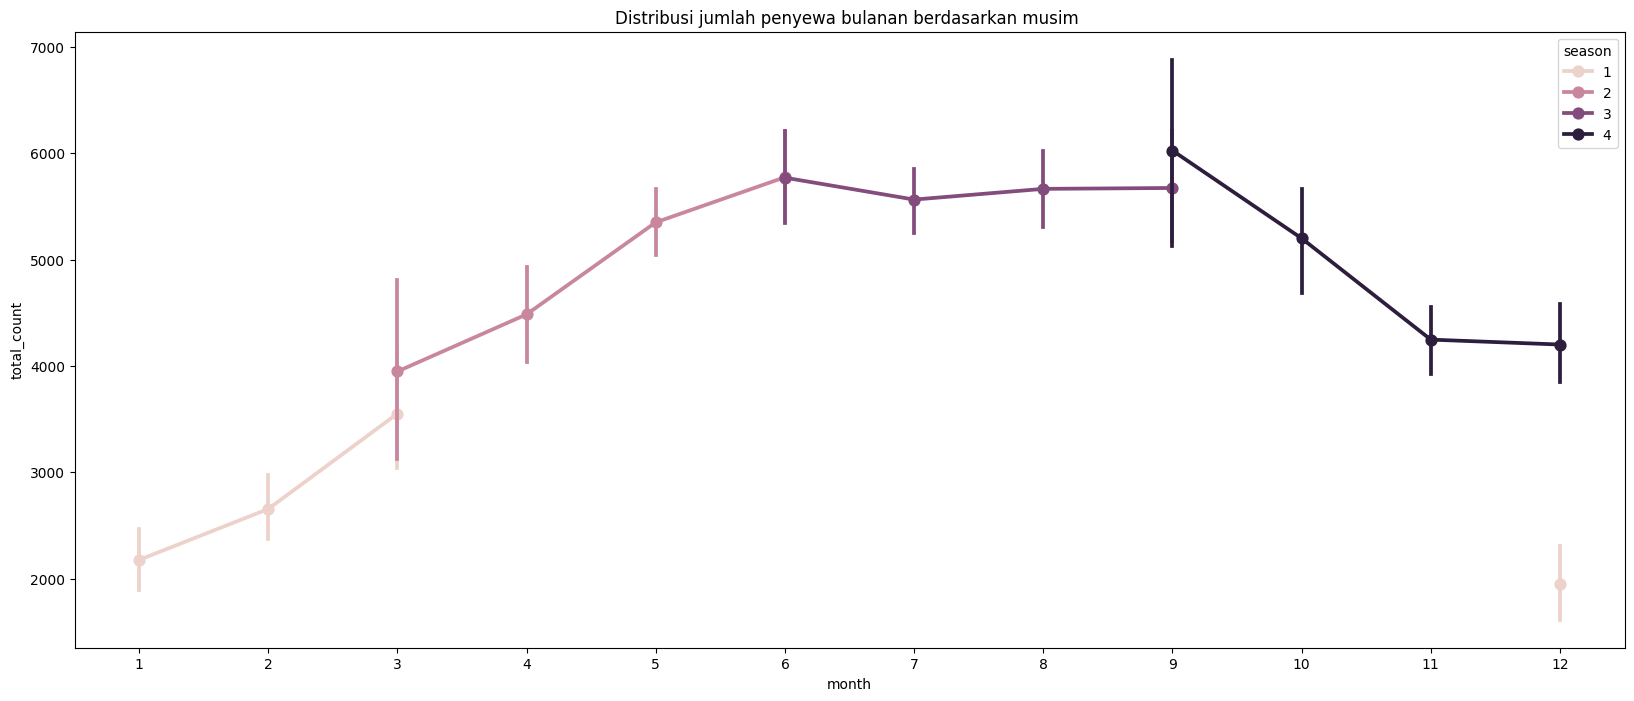

In [ ]:
categorical_cols = ['season', 'year', 'month', 'is_holiday', 'weekday', 'is_workingday', 'weather_condition']

fig,ax=plt.subplots(figsize=(20,8))
sn.pointplot(data=df_day[['month','total_count','season']],x='month',
             y='total_count',
             hue='season',ax=ax)
ax.set(title='Distribusi jumlah penyewa bulanan berdasarkan musim ')
# html file
#plotly.offline.plot(fig, filename='fig1.html')

- Representasi musim dalam distribusi diatas,

1- Musim semi, 2- Musim panas, 3- Musim hujan, 4- Musim dingin

Distribusi di atas menunjukkan jumlah Penyewa terendah untuk musim semi, kemudian jumlah meningkat di musim panas. Jumlah ini konstan sepanjang musim hujan. Jumlah ini mencapai puncaknya pada awal musim dingin, kemudian menurun setelahnya.

Mari lihat Distribusi pada Hari Kerja

[Text(0.5, 1.0, 'Distribusi bulanan jumlah penyewa pada hari kerja')]

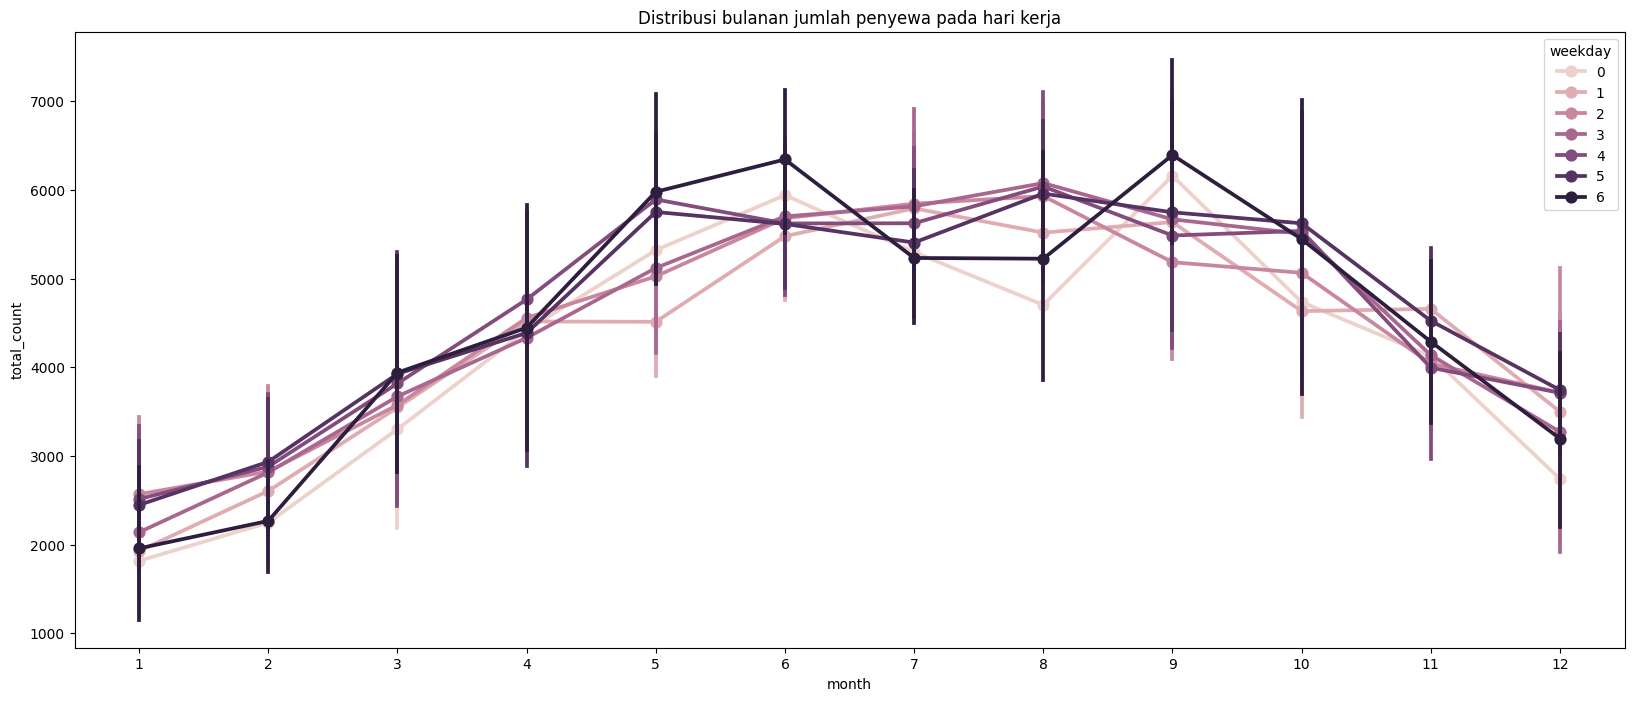

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sn.pointplot(data=df_day[['month','total_count','weekday']],x='month',y='total_count',
            hue='weekday',ax=ax)
ax.set(title='Distribusi bulanan jumlah penyewa pada hari kerja')
# html file
#plotly.offline.plot(fig, filename='bike_share.html')

Juga mari lihat distribusi Penyewa berdasarkan Bulan

[Text(0.5, 1.0, 'Distribusi penyewa berdasarkan bulan')]

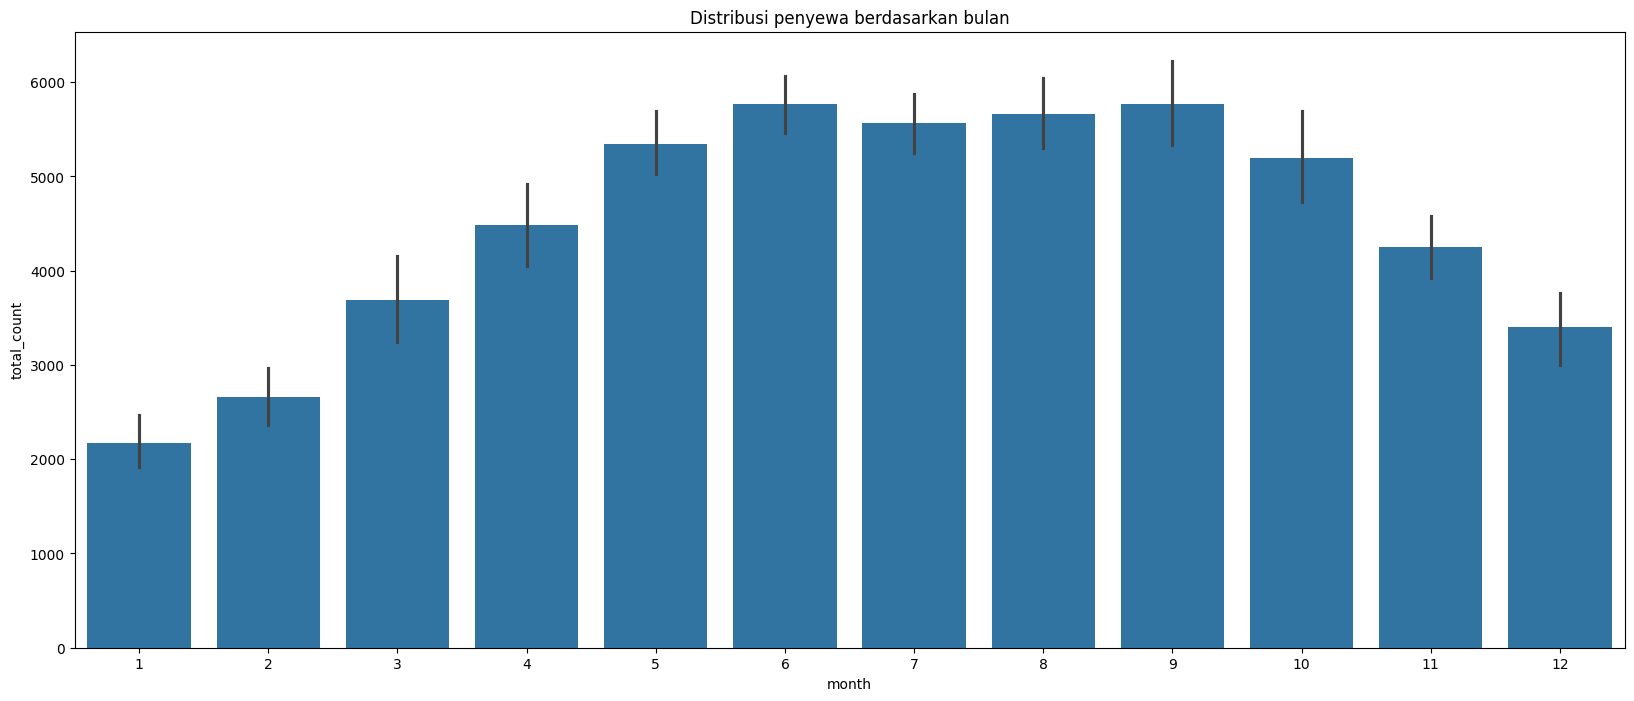

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sn.barplot(data=df_day[['month','total_count']],x='month',y='total_count',ax=ax)
ax.set(title='Distribusi penyewa berdasarkan bulan')
# html file
#plotly.offline.plot(fig, filename='fig3.html')

- Hubungan antar musim (season) dan jumlah sewa (total_count)

In [ ]:
fig = px.box(df_day, x='season', y='total_count')
fig.update_layout(title='Hubungan antara Musim dan Jumlah Sewa')

# html file
plotly.offline.plot(fig, filename='bike_share.html')
fig.show()

- Hubungan antar hari libur (is_holiday) dan jumlah sewa (total_count)

In [ ]:
fig = px.box(df_day, x='is_holiday', y='total_count')
fig.update_layout(title='Hubungan antara Hari Libur dan Jumlah Sewa')
# html file
plotly.offline.plot(fig, filename='bike_share.html')
fig.show()

- Hubungan antar Cuaca (weather_condition) dan Jumlah sewa (total_count)

In [ ]:
fig = px.box(df_day, x='weather_condition', y='total_count')
fig.update_layout(title='Hubungan antara Cuaca dan Jumlah Sewa')
# html file
plotly.offline.plot(fig, filename='bike_share.html')
fig.show()

- Scatter plot antar suhu (temp) dan Jumlah sewa (total_count)

In [ ]:
fig = px.scatter(df_day, x='temp', y='total_count', title='Scatter Plot antara Suhu dan Jumlah Sewa')
# html file
plotly.offline.plot(fig, filename='bike_share.html')
fig.show()

## Visualization & Explanatory Analysis

adalah proses memvisualisasikan data dan menjelaskan temuan atau pola yang ditemukan dalam data tersebut. Ini melibatkan penggunaan grafik, plot, dan visualisasi lainnya untuk membantu memahami data dengan lebih baik dan mengkomunikasikan hasil analisis kepada pemangku kepentingan secara efektif. Tujuannya adalah untuk mengidentifikasi tren, anomali, korelasi, dan pola penting lainnya dalam data yang mungkin tidak terlihat hanya dengan melihat tabel atau angka.

### Pertanyaan 1:

**1. Berapa jumlah total sewa sepeda (total_count) untuk tahun 2012 selama musim gugur (musim 3)?**

In [ ]:
filtered_data = df_day[(df_day["year"] == 1) & (df_day["season"] == 3)]

total_sewa_sepeda = filtered_data["total_count"].sum()

print("Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3):", total_sewa_sepeda)

Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3): 641479


### Pertanyaan 2:

**2. Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011?**

In [ ]:
filtered_data = df_day[(df_day["year"] == 0) & (df_day["season"] == 2) & (df_day["is_holiday"] == 1)]
total_sepeda_sewaan = filtered_data["total_count"].sum()

print("Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011:", total_sepeda_sewaan)

Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011: 7224


### Pertanyaan 3:

**3. Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?**

In [ ]:
filtered_data = df_day[(df_day["is_workingday"] == 1) & (df_day["casual"] > 0)]
fig = px.bar(filtered_data, x="weekday", y="casual", title="Jumlah Sewa Sepeda Casual pada Hari Kerja")
fig.update_xaxes(title="Hari Kerja")
fig.update_yaxes(title="Jumlah Sewa Sepeda Casual")
# html file
plotly.offline.plot(fig, filename='bike_share.html')
fig.show()

**Strategi:**

Untuk meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja, beberapa strategi yang dapat dipertimbangkan adalah:

1. Penawaran dan Promosi Khusus: Memberikan diskon atau penawaran khusus untuk penyewaan sepeda pada hari kerja kepada pengguna biasa (casual) dapat menjadi insentif yang menarik bagi mereka untuk menggunakan layanan lebih sering.

2. Program Keanggotaan atau Langganan: Membuat program keanggotaan atau langganan yang menawarkan tarif khusus atau keuntungan tambahan untuk pengguna biasa (casual) yang sering menggunakan layanan pada hari kerja dapat mendorong keterlibatan mereka.

3. Penambahan Fasilitas atau Lokasi: Membangun atau menambah fasilitas penyewaan sepeda di area-area yang sering dikunjungi pada hari kerja, seperti dekat stasiun kereta atau pusat perkantoran, dapat meningkatkan ketersediaan dan kenyamanan layanan.

4. Kampanye Pemasaran Targeted: Melakukan kampanye pemasaran yang ditargetkan secara spesifik kepada pengguna biasa (casual) yang sering menggunakan layanan pada hari kerja, dengan menyoroti manfaat dan kenyamanan penyewaan sepeda untuk mobilitas di perkotaan.

5. Peningkatan Kesadaran dan Edukasi: Mengadakan acara atau kampanye untuk meningkatkan kesadaran tentang manfaat penggunaan sepeda sebagai alat transportasi pada hari kerja, serta menyediakan edukasi tentang rute sepeda yang aman dan efisien di kota.

### Pertanyaan 4:

**4. Apa hubungan suhu (temp) dengan jumlah pengguna yang terdaftar?**

In [ ]:
fig = px.scatter(df_day, x="temp", y="registered", title="Hubungan Suhu dengan Jumlah Pengguna Terdaftar")
fig.update_xaxes(title="Suhu (temp)")
fig.update_yaxes(title="Jumlah Pengguna Terdaftar")
# html file
plotly.offline.plot(fig, filename='bike_share.html')
fig.show()

Pada grafik terlihat korelasi positif yang menunjukkan bahwa meningkatnya suhu (temp)  berpengaruh juga terhadap meningkatnya jumlah pengguna yang terdaftar.

### Pertanyaan 5:

**5. Apa pengaruh cuaca (weather_condition) terhadap jumlah sewa sepeda (total_count) selama musim gugur (season 3)?**

In [ ]:
# Filter musim gugur (season 3)
filtered_data = df_day[df_day["season"] == 3]

# Buat plot dengan Plotly untuk menganalisis pengaruh cuaca terhadap jumlah sewa sepeda
fig = px.bar(filtered_data, x="weather_condition", y="total_count", title="Pengaruh Cuaca terhadap Jumlah Sewa Sepeda (Musim Gugur)")
fig.update_xaxes(title="Cuaca (weather_condition)")
fig.update_yaxes(title="Jumlah Sewa Sepeda (total_count)")
# html file
plotly.offline.plot(fig, filename='bike_share.html')
# Tampilkan plot
fig.show()

- weather_condition :
	- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
	- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
    - 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
    - 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

Dari gradik yang telah dianalisa, dapat disimpulkan bahwa faktor cuaca memiliki pengaruh terhadap jumlah sepeda yang disewa.
dalam grafik menunjukkan, perubahan kondisi cuaca memiliki dampak yang jelas terhadap perilaku pengguna sepeda. Lebih spesifiknya, kita dapat melihat bahwa pada kondisi cuaca tertentu, seperti cuaca yang cerah atau sebagian berawan (weather_condition 1), jumlah sepeda yang disewa cenderung meningkat secara signifikan.

## Conclusion

- Conclution pertanyaan 1 :
Cuaca memiliki pengaruh terhadap jumlah sepeda yang disewa.


- Conclution pertanyaan 2 :
Sewa selama musim gugur 2012 mencapai 641.479. ini menandakan peluang bisnis yang kuat.

- Conclution Pertanyaan 3 : Jumlah sewa sepeda selama liburan musim panas 2011, mencapai 7224. itu berarti, demam bersepeda pada waktu liburan meningkat.

- Conclution pertanyaan 4 : Sewa sepeda mencapai puncaknya pada hari Jum'at. menandakan peningkatan menjelang akhir pekan.

- Conclution pertanyaan 5 : Suhu dengan Jumlah pengguna terdaftar penyewa, cuaca dapat mempengaruhi minat bersepeda. apabila suhu meningkat, jumlah penyewa ikut meningkat
